# Исследование интернет-магазина.

Вместе с отделом маркетинга нам надо подготовить список гипотез для увеличения выручки. Приоритизировать гипотезы, запустите A/B-тест и проанализировать результаты. В нашем распоряжение 3 таблицы: гипотезы, заказы и посетители.

В первой части анализа нам надо сделать приоритизация гипотез. Мы имеем 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
   
   Задача
 - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
 
Во второй части нам надо провели A/B-тест.

 Задача
 - Проанализируйте A/B-тест:
 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

 - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)
pd.options.display.max_colwidth = 400

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['ICE'] = round(hypothesis['ICE'], 2)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))
pd.options.display.max_colwidth = 400

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['RICE'] = round(hypothesis['RICE'], 2)
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [7]:
rice_data = (hypothesis[['RICE','Hypothesis']].sort_values(by='RICE', ascending=False))
ice_data = (hypothesis[['ICE','Hypothesis']].sort_values(by='ICE', ascending=False))

In [8]:
tmp = rice_data.merge(ice_data, on = 'Hypothesis')
cm = sns.light_palette("green", as_cmap=True)
tmp.style.background_gradient(cmap=cm)

,RICE,Hypothesis,ICE
0,112.000000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
1,56.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
2,40.000000,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000
3,40.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
4,16.200000,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
5,9.000000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000
6,4.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
7,4.000000,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000
8,3.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Различие в выведенных данных связано с тем что в RICE используют отхват пользователей, а в ICE охват не используют.

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:
 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Примите решение по результатам теста и объясните его. Варианты решений:
   1. Остановить тест, зафиксировать победу одной из групп.
   2. Остановить тест, зафиксировать отсутствие различий между группами.
   3. Продолжить тест.


In [9]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [11]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#visitors.info()
#orders.info()

In [16]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

In [17]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group > 1')['visitorId'].unique()
orders = orders.query('visitorId not in @double_users')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [18]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(10)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


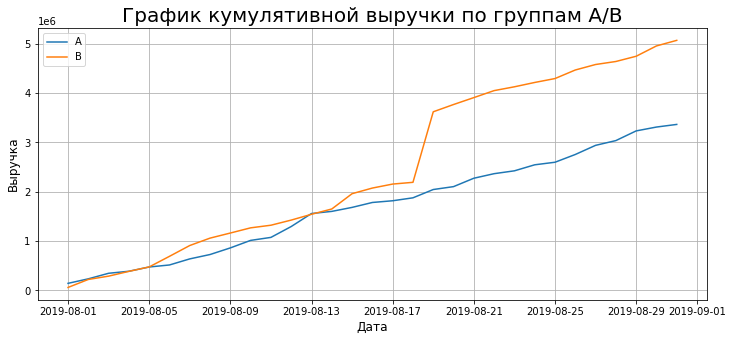

In [19]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (12,5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')

plt.xlabel('Дата', size= 12)
plt.ylabel('Выручка', size= 12)
plt.title('График кумулятивной выручки по группам А/В', size= 20)
plt.grid()
plt.legend()
plt.show()

Как видно из графика группа В лидирует на всей протяженности времени по отношению к группе А.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

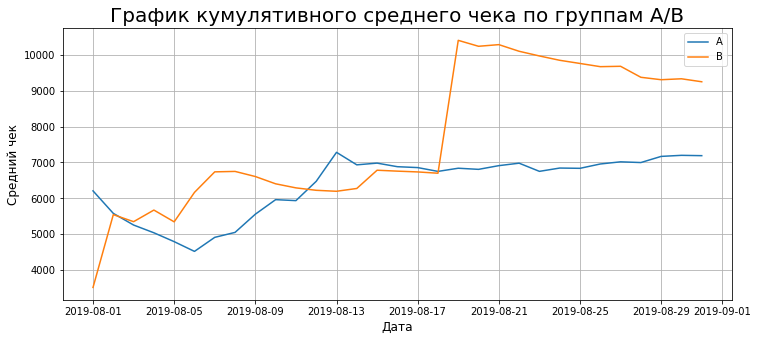

In [20]:
plt.figure(figsize = (12,5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')

plt.xlabel('Дата', size= 12)
plt.ylabel('Средний чек', size= 12)
plt.title('График кумулятивного среднего чека по группам А/В', size= 20)
plt.grid()
plt.legend()
plt.show()

С начала месяца и до 13 числа лидером была группа B, но 13 числа лидер изменился и стала группа А. Лидировала она не долго и с 17 числа средний чек резко вырос у гпуппы В до 10000. Скорее всего в этом скачке есть аномалии. В то время как у группы А в среднем с 13 числа средний чек колебался в районе 7000.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

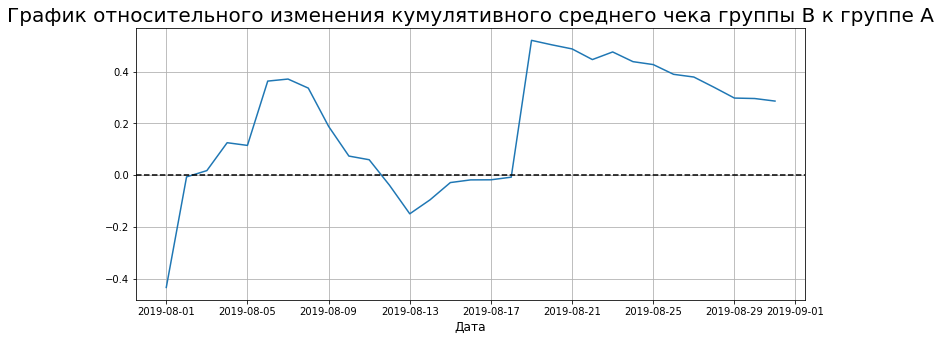

In [21]:
mergedCumulativeRevenue = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (12,5))
plt.plot(mergedCumulativeRevenue['date'], (
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
        )
plt.xlabel('Дата', size= 12)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size= 20)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()

Мы видим что с 9 по 17 число есть резкие скачки, в этом промежутке есть аномалии которые надо проверить.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

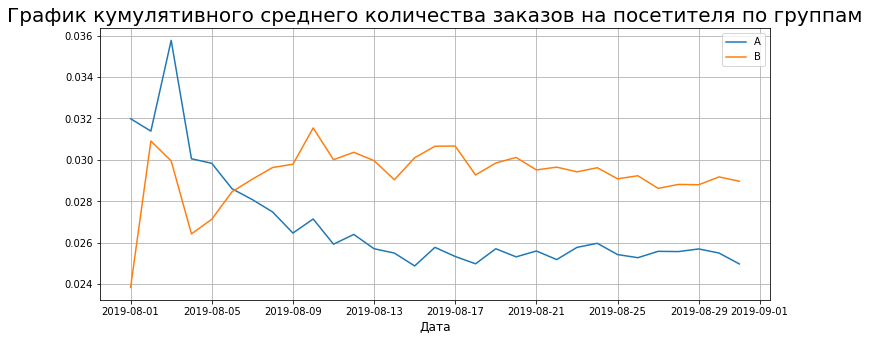

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата', size= 12)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', size= 20)
plt.grid()
plt.legend()
plt.show()

Конверсия группы В выглядит намного лучше конверсси группы А.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

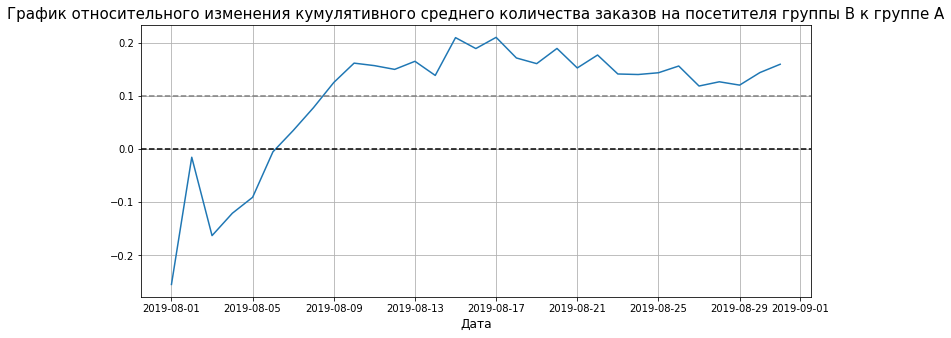

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xlabel('Дата', size= 12)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', size= 15)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.grid()

По прошествию 1 недели группа В стабильно на 10% выше конверсия чем у группы А.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

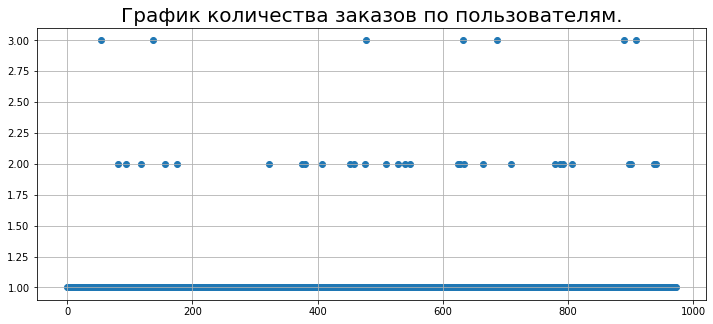

In [24]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
 
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize = (12,5))
plt.grid()
plt.title('График количества заказов по пользователям.', size= 20)
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Больше всего пользователей сделали всего 1 заказ.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не больше 5% пользователей сделили больше 1 заказов, а 1% пользователей сделали больше 2 заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

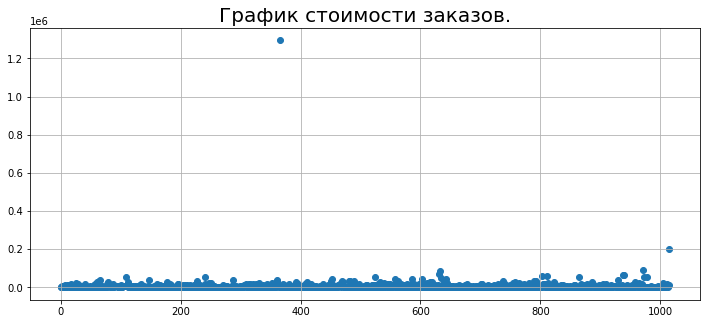

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize = (12,5))
plt.grid()
plt.title('График стоимости заказов.', size= 20)
plt.scatter(x_values, orders['revenue'])
plt.show()

На графике видно только 2 выброса. Один заказ на сумму свыше 1 миллиона очень сильно выделяется. Как и заказ в районе 200 тысяч. Эти заказы сильно выделяются на фоне всех остальных. Скорее всего это большик компании делали такие огромные заказы.

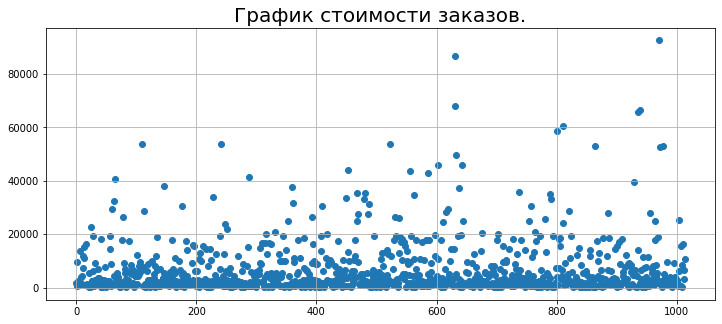

In [27]:
without_anomalies = orders[orders['revenue'] <= 200000]['revenue']
x_values = pd.Series(range(0, len(without_anomalies)))
plt.figure(figsize = (12,5))
plt.grid()
plt.title('График стоимости заказов.', size= 20)
plt.scatter(x_values, without_anomalies)
plt.show()

На данном графике лучше видно распределение стоимости заказов. Без 2х аномалий видно что большая часть заказов расположилась около 20000.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Все что прeвышает 26785 является аномалиями.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


H0 - Нет различий в среднем количестве заказов на посетителя между группами.

H1 - Есть различие в среднем количестве заказов на посетителя. 

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05

results = stats.mannwhitneyu(sampleA, sampleB)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: есть различие в среднем количестве заказов на посетителя")
else:
    print("Не получилось отвергнуть нулевую гипотезу: нет различий в среднем количестве заказов на посетителя между группами")

p-value: 0.011
Относительный показатель: 0.160
Отвергаем нулевую гипотезу: есть различие в среднем количестве заказов на посетителя


P-value меньше 0.05, значит нулевую гипотезу мы отвергаем, так как есть различия в среднем количестве заказов на посетителя между группами. Относительный показатель показывает что группа В выигрывает группу А на 16%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

H0 - Нет различий в среднем чеке заказа между группами.

H1 - Есть различие в среднем чеке заказа между группами. 

In [31]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: есть различие в среднем чеке заказа между группами")
else:
    print("Не получилось отвергнуть нулевую гипотезу: нет различий в среднем чеке заказа между группами")

p-value: 0.829
Относительный показатель: 0.287
Не получилось отвергнуть нулевую гипотезу: нет различий в среднем чеке заказа между группами


P-value существенно больше 0.05. Исходя из этого, различий в среднем чеке заказа между группами, нет, причин отвергать нулевую гипотезу, тоже нет. Относительный показатель показывает различие среднего чека. Показатель среднего чека группы В равен 28.7% но он не является статистически значимым для изменения гипотезы.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: visitorId, dtype: int64
55


In [33]:
revenue_lim = np.percentile(orders['revenue'], 95)
revenue_lim

26785.0

Количество аномалий 55.

H0 - Нет различий в среднем количестве заказов на посетителя между группами.

H1 - Есть различие в среднем количестве заказов на посетителя. 

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: есть различие в среднем количестве заказов на посетителя")
else:
    print("Не получилось отвергнуть нулевую гипотезу: нет различий в среднем количестве заказов на посетителя между группами")

p-value: 0.009
Относительный показатель: 0.189
Отвергаем нулевую гипотезу: есть различие в среднем количестве заказов на посетителя


По 'очищенным' данным можно сказать что они критично не изменились. Мы все так же отвергаем нулевую гипотезу и группа В лучше группы А.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

H0 - Нет различий в среднем чеке заказа между группами.

H1 - Есть различие в среднем чеке заказа между группами.

In [35]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05

results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'])

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: есть различие в среднем чеке заказа между группами")
else:
    print("Не получилось отвергнуть нулевую гипотезу: нет различий в среднем чеке заказа между группами")

p-value: 0.762
Относительный показатель: -0.022
Не получилось отвергнуть нулевую гипотезу: нет различий в среднем чеке заказа между группами


P-value не изменился. А вот относительный показатель изменился значительно, лидером 'сырых данных' среднего чека была группа В, а сейчас она проигрывает группе А и равна 2%. Скорее всего это связано с тем самым заказом на 1.2 миллиона. Эти 2% группы А не являются стат. значимыми.

### Примите решение по результатам теста и объясните его. Варианты решений:
 
 1.Остановить тест, зафиксировать победу одной из групп.
 
 2.Остановить тест, зафиксировать отсутствие различий между группами.
 
 3.Продолжить тест.

По проведенному анализу можно сделать вывод, что группа В является более прибыльной.  Кумулятивные метрики по выручке, среднего чека и количеству заказов значительно лидирует у группы В. В среднем пользователи совершают 1-2 заказа на сумму примерно ~20000.
Что можно сказать по «сырым»  и  «очищенным» данным, есть различие в среднем количестве заказов между группами, где лидером выступает группа В с показателем 16% по «сырым» данным, а по «очищенным» данным 18.9%. По «сырым»  и «очищенным» данным между группами А и В в среднем чеке различий нет. А вот по относительному показателю среднего чека по «сырым» данным группа В была лучше на 27.7%, в то время как, по «очищенным» данным средний чек стал ниже на 2% по сравнению с группой А (скорее всего это связано с 1 заказом на 1.2 миллиона). Делаем вывод, что можно остановить тест, зафиксировать победу одно из групп, а именно группу В.